In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
#data of Gaussian Distributions
np.random.seed(seed = 3)
#distribution1
mu1 = [2, 2]
sigma1 = [[5, -4], [-4, 5]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T

#distribution2
mu2 = [-2, -2]
sigma2 = [[3.5, 3], [3, 3.5]]
x2, y2= np.random.multivariate_normal(mu2, sigma2, 100).T

mu = [mu1,mu2]
sigma = [sigma1,sigma2]


In [3]:
#Creating the X data

x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
x = x.reshape(-1,1)
y = y.reshape(-1,1)

X = np.concatenate((x,y), axis = 1)

#Creating the y data 
a = np.zeros(100)
b = np.ones(100)

Y = np.concatenate((a,b))

#Creating arrays for plotting decision boundaries
N = 100
X_ = np.linspace(-8, 8, N)
Y_ = np.linspace(-8, 8, N)
X_, Y_ = np.meshgrid(X_, Y_)



In [4]:
#NAIVE BAYES CLASSIFIER
#Splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

#Fitting the model
model = GaussianNB()
model.fit(X_train, y_train)

#Predicting the model
y_pred = model.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#OPTIMAL BAYES CLASSIFIER
def predict_Bayes_class(X,mu_list,sigma_list): 
    scores = []  
    for p in range(2):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu[p], cov=sigma[p])
        scores.append(score)
             
    return np.argmax(scores)


Accuracy: 0.9666666666666667


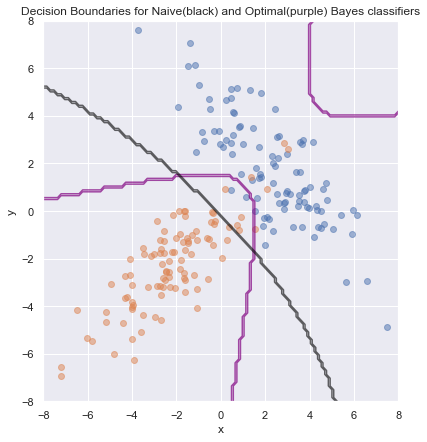

In [5]:
# a) PLOTTING DECISION BOUNDARIES FOR THE TWO CLASSIFIERS

#Creating the Figure
fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(1, 2, 2)

#Plot the decision boundary for Optimal Bayes
cc = np.asarray([ predict_Bayes_class(np.array([a,b]),mu,sigma) 
                     for a, b in zip(np.ravel(X_), np.ravel(Y_)) ] )
C = cc.reshape(X_.shape)
ax.contour( X_, Y_, C, 1, alpha = .7, colors = ('purple'))

#Plot the decsion boundary for Naive Bayes
zz = np.array(  [model.predict( [[xx,yy]])[0] 
                     for xx, yy in zip(np.ravel(X_), np.ravel(Y_)) ] )
Z = zz.reshape(X_.shape)
ax.contour( X_, Y_, Z, 1, alpha = .6, colors = ('black'))

ax.scatter(x1, y1, alpha = .5)
ax.scatter(x2, y2, alpha = .5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Decision Boundaries for Naive(black) and Optimal(purple) Bayes classifiers')
plt.show()

In [6]:
# b) COMPARING BOTH ACCURACIES

#Optimal Bayes accuracy
y_pred1 = np.array(  [predict_Bayes_class(np.array([xx,yy]),mu,sigma) 
                     for xx, yy in zip(np.ravel(X[:,0]), np.ravel(X[:,1])) ] )
print("Optimal Bayes accuracy:")
print(metrics.accuracy_score(Y, y_pred1,normalize=True, sample_weight=None))

#Naive Bayes accuracy
print("Naive Bayes accuracy:")
print(metrics.accuracy_score(y_test, y_pred,normalize=True, sample_weight=None))

Optimal Bayes accuracy:
0.965
Naive Bayes accuracy:
0.9666666666666667
